In [63]:
import pandas as pd
import datetime
import collections
import seaborn as sns
import matplotlib.pyplot as plt 

In [64]:
#Filter movie countries to USA
#Convert date_published and year to the correct date format
#Drop 'budget', 'usa_gross_income', 'worlwide_gross_income','metascore' from data frame due to the amount of missing data

In [65]:
drop_col = ['budget', 'usa_gross_income', 'worlwide_gross_income','metascore']

movies = pd.read_csv('imdb_movies.csv') #Import movies
ratings = pd.read_csv('imdb_ratings2.csv') #Import ratings

usa_movies = movies.merge(ratings, on='imdb_title_id', suffixes=('_movies','_ratings')) #merge ratings onto movies through the imdb title id
usa_movies = pd.DataFrame(usa_movies[usa_movies['country'] =='USA']) #filter the movies by the country USA and store as a dataframe
usa_movies['date_published'] = usa_movies['date_published'].astype('datetime64[ns]') #convert date into date data type and replace onto date column
usa_movies['year'] = pd.DatetimeIndex(usa_movies['date_published']).year #create a year column and extract year from date_publish columns
usa_movies = usa_movies.drop(drop_col, axis=1) #drop unnecessary columns or columns with a lot of missing data
usa_movies.info() #print data information



<class 'pandas.core.frame.DataFrame'>
Int64Index: 28510 entries, 0 to 85838
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   imdb_title_id          28510 non-null  object        
 1   title                  28510 non-null  object        
 2   original_title         28510 non-null  object        
 3   year                   28510 non-null  int64         
 4   date_published         28510 non-null  datetime64[ns]
 5   genre                  28510 non-null  object        
 6   duration               28510 non-null  int64         
 7   country                28510 non-null  object        
 8   language               28165 non-null  object        
 9   director               28476 non-null  object        
 10  writer                 28309 non-null  object        
 11  production_company     27350 non-null  object        
 12  actors                 28484 non-null  object        
 13  d

In [66]:
usa_movies.head() #print first 5 rows

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,(M) All Ages Avg,(M) <18 Avg,(M) 18-29 Avg,(M) 30-44 Avg,(M) >45 Avg,(F) All Ages Avg,(F) <18 Avg,(F) 18-29 Avg,(F) 30-44 Avg,(F) >45 Avg
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,6.2,7.0,5.9,5.6,6.7,6.0,7.3,5.9,5.7,4.5
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.1,NaN,5.2,4.9,5.2,5.9,NaN,5.7,5.5,6.1
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1913,1913-01-01,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,NaN,5.6,5.7,5.8,5.8,NaN,6.3,5.1,6.5
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,5.7,NaN,5.1,5.6,5.8,6.4,NaN,9.0,5.3,7.0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,5.9,NaN,4.9,5.7,6.3,6.5,NaN,5.8,6.6,6.8


In [67]:
unique_genre = usa_movies['genre'].str.split(', ').explode() #split the genres into individual instead of the genres clumping together
#genre = genre
unique_genre

0          Romance
3            Drama
3          History
5        Biography
5            Drama
           ...    
85837    Animation
85837    Adventure
85837       Family
85838       Action
85838       Comedy
Name: genre, Length: 61742, dtype: object

Which genre has the most movies?

In [68]:
genre_count = collections.Counter(unique_genre)
genre_count = genre_count.most_common() #Count each genre
genre_count

[('Drama', 13827),
 ('Comedy', 9971),
 ('Romance', 5131),
 ('Horror', 4590),
 ('Thriller', 4382),
 ('Action', 4273),
 ('Crime', 4266),
 ('Adventure', 2854),
 ('Mystery', 2012),
 ('Sci-Fi', 1774),
 ('Family', 1285),
 ('Fantasy', 1175),
 ('Western', 1127),
 ('Musical', 902),
 ('Music', 810),
 ('Biography', 703),
 ('War', 647),
 ('Film-Noir', 647),
 ('Sport', 492),
 ('History', 439),
 ('Animation', 432),
 ('Documentary', 1),
 ('News', 1),
 ('Reality-TV', 1)]

In [69]:
genre_count_df = pd.DataFrame(genre_count, columns=['Genre','Count']) #save into dataframe
genre_count_df

,Genre,Count
0,Drama,13827
1,Comedy,9971
2,Romance,5131
3,Horror,4590
4,Thriller,4382
5,Action,4273
6,Crime,4266
7,Adventure,2854
8,Mystery,2012
9,Sci-Fi,1774


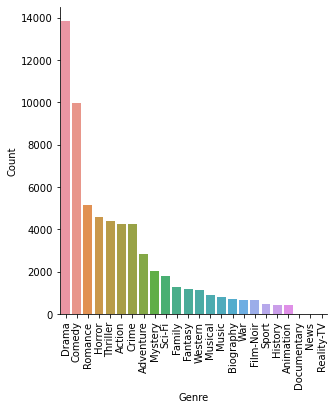

In [70]:
sns.catplot(x='Genre',y='Count', data=genre_count_df, kind='bar')
plt.xticks(rotation=90)
plt.show()

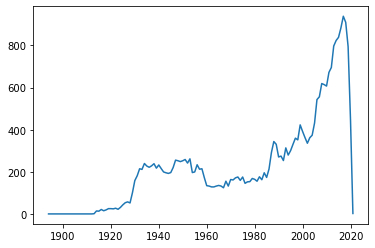

In [71]:
unique_yearngenre = usa_movies[['year','genre']]

year=unique_yearngenre['year'].value_counts().sort_index().plot(kind ='line') #value_counts()#.plot(kind='line')
year


#plt.plot()
#plt.show()

In [72]:
unique_yearngenre = usa_movies[['year','genre']]
unique_yearngenre


unique_yearngenre1 = (unique_yearngenre.set_index(['year'])['genre']
                    .astype(str)
                    .str.split(',', expand=True)
                    .stack()
                    .reset_index(level=-1, drop=True)
                    .reset_index(name='genre'))
unique_yearngenre1

,year,genre
0,1894,Romance
1,1912,Drama
2,1912,History
3,1913,Biography
4,1913,Drama
...,...,...
61737,2019,Animation
61738,2019,Adventure
61739,2019,Family
61740,2020,Action


Count how each genre progressed over the years

In [73]:
u=unique_yearngenre1[unique_yearngenre1['year']>1970].groupby('year')['genre']
u

In [74]:
['(All) <18 Avg', '(All) 18-29 Avg', '(All) 30-44 Avg', '(All) >45 Avg']

['(All) <18 Avg', '(All) 18-29 Avg', '(All) 30-44 Avg', '(All) >45 Avg']

In [75]:

#calculate the distribution of each genre

In [76]:
usa_movies['(All) All Ages Avg'] = usa_movies.iloc[:,32:36].mean(axis=1)
usa_movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,(M) <18 Avg,(M) 18-29 Avg,(M) 30-44 Avg,(M) >45 Avg,(F) All Ages Avg,(F) <18 Avg,(F) 18-29 Avg,(F) 30-44 Avg,(F) >45 Avg,(All) All Ages Avg
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,7.0,5.9,5.6,6.7,6.0,7.3,5.9,5.7,4.5,6.375000
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,NaN,5.2,4.9,5.2,5.9,NaN,5.7,5.5,6.1,5.200000
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1913,1913-01-01,"Biography, Drama",60,USA,English,Sidney Olcott,...,NaN,5.6,5.7,5.8,5.8,NaN,6.3,5.1,6.5,5.666667
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,NaN,5.1,5.6,5.8,6.4,NaN,9.0,5.3,7.0,5.633333
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,NaN,4.9,5.7,6.3,6.5,NaN,5.8,6.6,6.8,5.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85828,tt9887520,Season of Love,Season of Love,2019,2019-11-30,"Comedy, Romance",105,USA,NaN,Christin Baker,...,NaN,7.0,5.7,10.0,7.7,NaN,8.2,7.6,6.5,7.766667
85829,tt9887580,Bulletproof 2,Bulletproof 2,2020,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,...,NaN,3.8,3.5,3.5,3.2,NaN,1.0,2.8,3.4,3.533333
85836,tt9894470,VFW,VFW,2020,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,...,6.0,6.4,6.1,5.9,5.6,NaN,5.4,5.7,5.3,6.075000
85837,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,2019-04-18,"Animation, Adventure, Family",108,USA,English,Robert Fernandez,...,4.0,5.2,5.4,4.8,6.9,NaN,6.4,6.4,8.3,5.150000


In [77]:
usa_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', '(All) <18 Avg', '(All) 18-29 Avg',
       '(All) 30-44 Avg', '(All) >45 Avg', '(M) All Ages Avg', '(M) <18 Avg',
       '(M) 18-29 Avg', '(M) 30-44 Avg', '(M) >45 Avg', '(F) All Ages Avg',
       '(F) <18 Avg', '(F) 18-29 Avg', '(F) 30-44 Avg', '(F) >45 Avg',
       '(All) All Ages Avg'],
      dtype='object')

Over the years which genre became more popular?

In [78]:
col = ['genre', '(All) All Ages Avg', '(M) All Ages Avg', '(F) All Ages Avg']
genre_rating = usa_movies[col]
genre_rating.head()

,genre,(All) All Ages Avg,(M) All Ages Avg,(F) All Ages Avg
0,Romance,6.375000,6.2,6.0
3,"Drama, History",5.200000,5.1,5.9
5,"Biography, Drama",5.666667,5.7,5.8
17,Drama,5.633333,5.7,6.4
19,"Crime, Drama",5.766667,5.9,6.5


In [178]:
top_genres = ['Drama', 'Comedy', 'Romance', 'Horror', 'Thriller','Action','Crime','Adventure','Mystery','Scifi']
genre_rating_unstack = (genre_rating.set_index(['(All) All Ages Avg', '(M) All Ages Avg', '(F) All Ages Avg'])['genre']
                    .astype(str)
                    .str.split(',', expand=True)
                    .stack()
                    .reset_index(level=-1, drop=True)
                    .reset_index(name='Genre'))
genre_rating_unstack

,(All) All Ages Avg,(M) All Ages Avg,(F) All Ages Avg,Genre
0,6.375000,6.2,6.0,Romance
1,5.200000,5.1,5.9,Drama
2,5.200000,5.1,5.9,History
3,5.666667,5.7,5.8,Biography
4,5.666667,5.7,5.8,Drama
...,...,...,...,...
61737,5.150000,5.2,6.9,Animation
61738,5.150000,5.2,6.9,Adventure
61739,5.150000,5.2,6.9,Family
61740,5.075000,5.1,5.1,Action


In [179]:
all_ages_genre_rating = genre_rating_unstack[['(All) All Ages Avg', 'Genre']]
male_ages_genre_rating=genre_rating_unstack[['(M) All Ages Avg', 'Genre']]
female_ages_genre_rating=genre_rating_unstack[['(F) All Ages Avg', 'Genre']]

In [180]:
all_ages_genre_rating

,(All) All Ages Avg,Genre
0,6.375000,Romance
1,5.200000,Drama
2,5.200000,History
3,5.666667,Biography
4,5.666667,Drama
...,...,...
61737,5.150000,Animation
61738,5.150000,Adventure
61739,5.150000,Family
61740,5.075000,Action


In [181]:
#popular genre
top_genres = ['Drama', 'Comedy', 'Romance', 'Horror', 'Thriller','Action','Crime','Adventure','Mystery','Scifi']
genre_rating_unstack['Genre'].unique()


array(['Romance', 'Drama', ' History', 'Biography', ' Drama', 'Crime',
       ' Horror', 'Western', 'Fantasy', 'Comedy', 'Family', ' Fantasy',
       ' Adventure', 'Adventure', ' Family', 'Action', ' Romance', ' War',
       ' Crime', ' Sci-Fi', ' Comedy', ' Western', 'Mystery', ' Thriller',
       ' Sport', ' Mystery', 'History', ' Musical', 'Horror', ' Action',
       ' Music', ' Film-Noir', 'Musical', 'Music', 'Thriller',
       ' Biography', 'Animation', 'Sci-Fi', 'War', 'Film-Noir',
       ' Animation', 'Documentary', 'Sport', ' News', ' Reality-TV'],
      dtype=object)

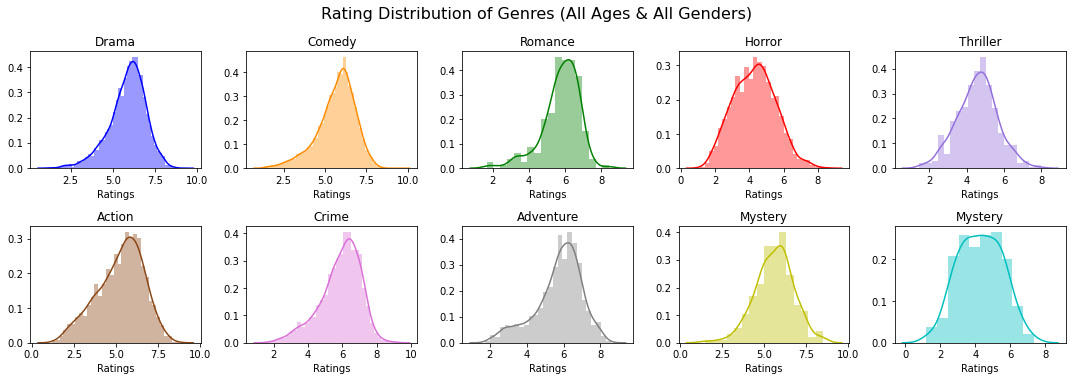

In [182]:
fig,ax =plt.subplots(2,5,figsize=(15,5))

plt.suptitle('Rating Distribution of Genres (All Ages & All Genders)', y=1.05, size=16)
plt.sca(ax[0][0])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Drama']['(All) All Ages Avg'], color='b')
plt.xlabel('Ratings')
plt.title('Drama')

plt.sca(ax[0][1])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Comedy']['(All) All Ages Avg'], color = 'darkorange')
plt.xlabel('Ratings')
plt.title('Comedy')

plt.sca(ax[0][2])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Romance']['(All) All Ages Avg'], color = 'g')
plt.xlabel('Ratings')
plt.title('Romance')


plt.sca(ax[0][3])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Horror']['(All) All Ages Avg'], color = 'r')
plt.xlabel('Ratings')
plt.title('Horror')


plt.sca(ax[0][4])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Thriller']['(All) All Ages Avg'], color = 'mediumpurple')
plt.xlabel('Ratings')
plt.title('Thriller')

plt.sca(ax[1][0])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Action']['(All) All Ages Avg'], color = 'saddlebrown')
plt.xlabel('Ratings')
plt.title('Action')

plt.sca(ax[1][1])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Crime']['(All) All Ages Avg'], color = 'orchid')
plt.xlabel('Ratings')
plt.title('Crime')


plt.sca(ax[1][2])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Adventure']['(All) All Ages Avg'], color = 'grey')
plt.xlabel('Ratings')
plt.title('Adventure')

plt.sca(ax[1][3])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Mystery']['(All) All Ages Avg'], color = 'y')
plt.xlabel('Ratings')
plt.title('Mystery')

plt.sca(ax[1][4])
sns.distplot(all_ages_genre_rating[all_ages_genre_rating['Genre'] == 'Sci-Fi']['(All) All Ages Avg'], color = 'c')
plt.xlabel('Ratings')
plt.title('Mystery')

plt.tight_layout()

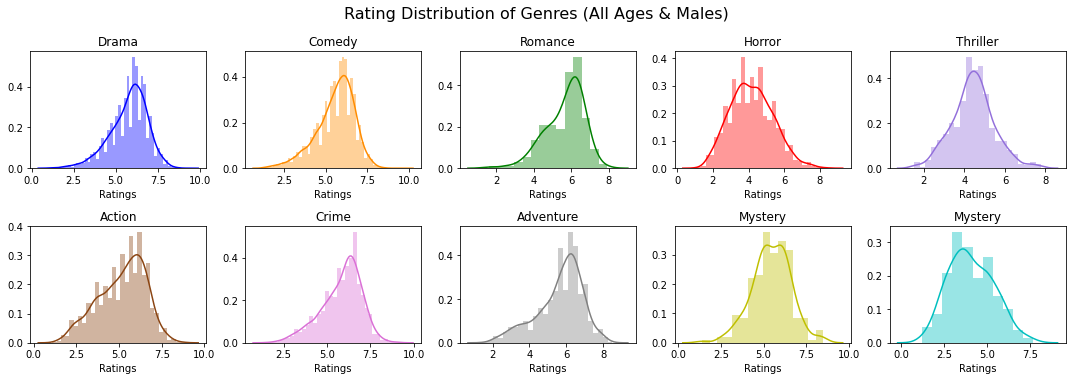

In [183]:
fig,ax =plt.subplots(2,5,figsize=(15,5))

plt.suptitle('Rating Distribution of Genres (All Ages & Males)', y=1.05, size=16)
plt.sca(ax[0][0])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Drama']['(M) All Ages Avg'], color='b')
plt.xlabel('Ratings')
plt.title('Drama')

plt.sca(ax[0][1])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Comedy']['(M) All Ages Avg'], color = 'darkorange')
plt.xlabel('Ratings')
plt.title('Comedy')

plt.sca(ax[0][2])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Romance']['(M) All Ages Avg'], color = 'g')
plt.xlabel('Ratings')
plt.title('Romance')


plt.sca(ax[0][3])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Horror']['(M) All Ages Avg'], color = 'r')
plt.xlabel('Ratings')
plt.title('Horror')


plt.sca(ax[0][4])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Thriller']['(M) All Ages Avg'], color = 'mediumpurple')
plt.xlabel('Ratings')
plt.title('Thriller')

plt.sca(ax[1][0])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Action']['(M) All Ages Avg'], color = 'saddlebrown')
plt.xlabel('Ratings')
plt.title('Action')

plt.sca(ax[1][1])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Crime']['(M) All Ages Avg'], color = 'orchid')
plt.xlabel('Ratings')
plt.title('Crime')


plt.sca(ax[1][2])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Adventure']['(M) All Ages Avg'], color = 'grey')
plt.xlabel('Ratings')
plt.title('Adventure')

plt.sca(ax[1][3])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Mystery']['(M) All Ages Avg'], color = 'y')
plt.xlabel('Ratings')
plt.title('Mystery')

plt.sca(ax[1][4])
sns.distplot(male_ages_genre_rating[male_ages_genre_rating['Genre'] == 'Sci-Fi']['(M) All Ages Avg'], color = 'c')
plt.xlabel('Ratings')
plt.title('Mystery')

plt.tight_layout()

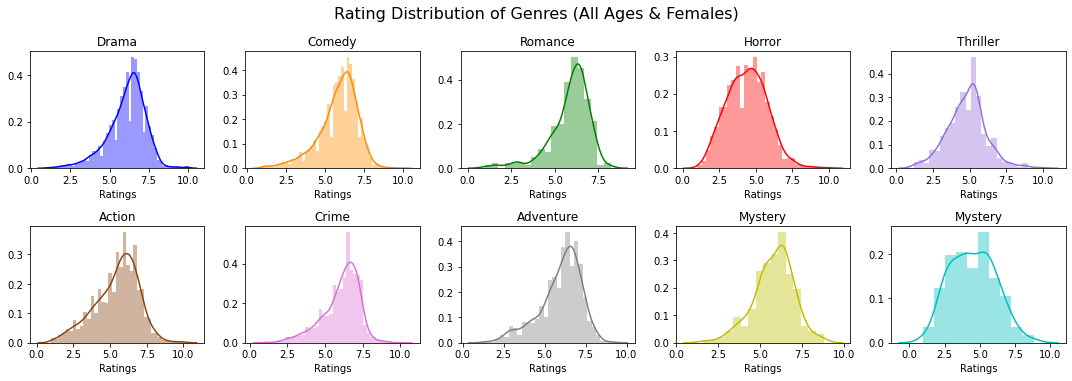

In [184]:
fig,ax =plt.subplots(2,5,figsize=(15,5))

plt.suptitle('Rating Distribution of Genres (All Ages & Females)', y=1.05, size=16)
plt.sca(ax[0][0])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Drama']['(F) All Ages Avg'], color='b')
plt.xlabel('Ratings')
plt.title('Drama')

plt.sca(ax[0][1])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Comedy']['(F) All Ages Avg'], color = 'darkorange')
plt.xlabel('Ratings')
plt.title('Comedy')

plt.sca(ax[0][2])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Romance']['(F) All Ages Avg'], color = 'g')
plt.xlabel('Ratings')
plt.title('Romance')


plt.sca(ax[0][3])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Horror']['(F) All Ages Avg'], color = 'r')
plt.xlabel('Ratings')
plt.title('Horror')


plt.sca(ax[0][4])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Thriller']['(F) All Ages Avg'], color = 'mediumpurple')
plt.xlabel('Ratings')
plt.title('Thriller')

plt.sca(ax[1][0])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Action']['(F) All Ages Avg'], color = 'saddlebrown')
plt.xlabel('Ratings')
plt.title('Action')

plt.sca(ax[1][1])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Crime']['(F) All Ages Avg'], color = 'orchid')
plt.xlabel('Ratings')
plt.title('Crime')


plt.sca(ax[1][2])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Adventure']['(F) All Ages Avg'], color = 'grey')
plt.xlabel('Ratings')
plt.title('Adventure')

plt.sca(ax[1][3])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Mystery']['(F) All Ages Avg'], color = 'y')
plt.xlabel('Ratings')
plt.title('Mystery')

plt.sca(ax[1][4])
sns.distplot(female_ages_genre_rating[female_ages_genre_rating['Genre'] == 'Sci-Fi']['(F) All Ages Avg'], color = 'c')
plt.xlabel('Ratings')
plt.title('Mystery')

plt.tight_layout()

In [197]:
top_genres = ['Drama', 'Comedy', 'Romance', 'Horror', 'Thriller','Action','Crime','Adventure','Mystery','Scifi']
top_genre_filter =genre_rating_unstack[genre_rating_unstack.isin(top_genres)]
genre_rating_unstack[top_genre_filter]

ValueError: Boolean array expected for the condition, not object

In [ ]:
genre_rating_unstack[genre_rating_unstack['Genre']=='Drama'].mean()